## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9691089	total: 58.6ms	remaining: 58.6s
1:	learn: 0.9512034	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9310119	total: 60.9ms	remaining: 20.2s
3:	learn: 0.9177932	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9016564	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8847045	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8690425	total: 64.8ms	remaining: 9.19s
7:	learn: 0.8542951	total: 65.7ms	remaining: 8.15s
8:	learn: 0.8399056	total: 66.6ms	remaining: 7.33s
9:	learn: 0.8236303	total: 67.5ms	remaining: 6.68s
10:	learn: 0.8108223	total: 68.3ms	remaining: 6.14s
11:	learn: 0.7970488	total: 69.1ms	remaining: 5.69s
12:	learn: 0.7830857	total: 70ms	remaining: 5.32s
13:	learn: 0.7691131	total: 70.9ms	remaining: 4.99s
14:	learn: 0.7565787	total: 71.8ms	remaining: 4.71s
15:	learn: 0.7442025	total: 72.7ms	remaining: 4.47s
16:	learn: 0.7334144	total: 73.6ms	remaining: 4.26s
17:	learn: 0.7218081	total: 74.5ms	remaining: 4.06s
18:	learn: 0.7100405	total: 75.3ms	remaining: 

55:	learn: 0.4426743	total: 109ms	remaining: 1.84s
56:	learn: 0.4391186	total: 110ms	remaining: 1.82s
57:	learn: 0.4340062	total: 111ms	remaining: 1.8s
58:	learn: 0.4304993	total: 112ms	remaining: 1.78s
59:	learn: 0.4259746	total: 113ms	remaining: 1.76s
60:	learn: 0.4218362	total: 114ms	remaining: 1.75s
61:	learn: 0.4175746	total: 114ms	remaining: 1.73s
62:	learn: 0.4136048	total: 115ms	remaining: 1.72s
63:	learn: 0.4097849	total: 116ms	remaining: 1.7s
64:	learn: 0.4066078	total: 117ms	remaining: 1.69s
65:	learn: 0.4030334	total: 118ms	remaining: 1.67s
66:	learn: 0.3986772	total: 119ms	remaining: 1.66s
67:	learn: 0.3956389	total: 120ms	remaining: 1.65s
68:	learn: 0.3922543	total: 121ms	remaining: 1.63s
69:	learn: 0.3894012	total: 122ms	remaining: 1.62s
70:	learn: 0.3867703	total: 123ms	remaining: 1.61s
71:	learn: 0.3823605	total: 124ms	remaining: 1.6s
72:	learn: 0.3791609	total: 125ms	remaining: 1.58s
73:	learn: 0.3757583	total: 126ms	remaining: 1.57s
74:	learn: 0.3732943	total: 127ms	

147:	learn: 0.2552514	total: 192ms	remaining: 1.11s
148:	learn: 0.2541530	total: 193ms	remaining: 1.1s
149:	learn: 0.2532725	total: 194ms	remaining: 1.1s
150:	learn: 0.2522774	total: 195ms	remaining: 1.1s
151:	learn: 0.2512920	total: 196ms	remaining: 1.09s
152:	learn: 0.2504942	total: 197ms	remaining: 1.09s
153:	learn: 0.2499229	total: 197ms	remaining: 1.08s
154:	learn: 0.2490578	total: 198ms	remaining: 1.08s
155:	learn: 0.2484577	total: 199ms	remaining: 1.08s
156:	learn: 0.2477714	total: 200ms	remaining: 1.07s
157:	learn: 0.2471313	total: 201ms	remaining: 1.07s
158:	learn: 0.2468158	total: 202ms	remaining: 1.07s
159:	learn: 0.2462536	total: 203ms	remaining: 1.06s
160:	learn: 0.2451887	total: 203ms	remaining: 1.06s
161:	learn: 0.2445046	total: 204ms	remaining: 1.06s
162:	learn: 0.2439228	total: 205ms	remaining: 1.05s
163:	learn: 0.2432832	total: 206ms	remaining: 1.05s
164:	learn: 0.2424413	total: 207ms	remaining: 1.05s
165:	learn: 0.2413601	total: 208ms	remaining: 1.04s
166:	learn: 0.2

264:	learn: 0.1890512	total: 300ms	remaining: 833ms
265:	learn: 0.1887157	total: 301ms	remaining: 832ms
266:	learn: 0.1881993	total: 302ms	remaining: 830ms
267:	learn: 0.1879680	total: 303ms	remaining: 829ms
268:	learn: 0.1877430	total: 304ms	remaining: 827ms
269:	learn: 0.1873512	total: 305ms	remaining: 825ms
270:	learn: 0.1867446	total: 306ms	remaining: 823ms
271:	learn: 0.1861888	total: 307ms	remaining: 821ms
272:	learn: 0.1855587	total: 308ms	remaining: 820ms
273:	learn: 0.1851604	total: 309ms	remaining: 818ms
274:	learn: 0.1847512	total: 310ms	remaining: 816ms
275:	learn: 0.1840023	total: 311ms	remaining: 815ms
276:	learn: 0.1836272	total: 312ms	remaining: 813ms
277:	learn: 0.1831902	total: 312ms	remaining: 811ms
278:	learn: 0.1829305	total: 313ms	remaining: 809ms
279:	learn: 0.1824102	total: 314ms	remaining: 808ms
280:	learn: 0.1820304	total: 315ms	remaining: 806ms
281:	learn: 0.1818611	total: 316ms	remaining: 804ms
282:	learn: 0.1816727	total: 318ms	remaining: 805ms
283:	learn: 

354:	learn: 0.1576433	total: 383ms	remaining: 697ms
355:	learn: 0.1575443	total: 384ms	remaining: 695ms
356:	learn: 0.1575070	total: 385ms	remaining: 694ms
357:	learn: 0.1574742	total: 386ms	remaining: 692ms
358:	learn: 0.1574396	total: 387ms	remaining: 691ms
359:	learn: 0.1568470	total: 388ms	remaining: 690ms
360:	learn: 0.1567228	total: 389ms	remaining: 688ms
361:	learn: 0.1563985	total: 390ms	remaining: 687ms
362:	learn: 0.1563157	total: 391ms	remaining: 685ms
363:	learn: 0.1559404	total: 391ms	remaining: 684ms
364:	learn: 0.1558457	total: 392ms	remaining: 683ms
365:	learn: 0.1555177	total: 393ms	remaining: 681ms
366:	learn: 0.1554395	total: 394ms	remaining: 680ms
367:	learn: 0.1550915	total: 395ms	remaining: 679ms
368:	learn: 0.1546588	total: 396ms	remaining: 678ms
369:	learn: 0.1542983	total: 397ms	remaining: 676ms
370:	learn: 0.1542262	total: 398ms	remaining: 675ms
371:	learn: 0.1538989	total: 399ms	remaining: 674ms
372:	learn: 0.1537588	total: 400ms	remaining: 672ms
373:	learn: 

475:	learn: 0.1283418	total: 492ms	remaining: 541ms
476:	learn: 0.1280046	total: 493ms	remaining: 540ms
477:	learn: 0.1279563	total: 494ms	remaining: 539ms
478:	learn: 0.1278912	total: 494ms	remaining: 538ms
479:	learn: 0.1278456	total: 495ms	remaining: 537ms
480:	learn: 0.1274726	total: 496ms	remaining: 536ms
481:	learn: 0.1271660	total: 497ms	remaining: 534ms
482:	learn: 0.1269984	total: 498ms	remaining: 534ms
483:	learn: 0.1269438	total: 499ms	remaining: 532ms
484:	learn: 0.1268785	total: 500ms	remaining: 531ms
485:	learn: 0.1268332	total: 501ms	remaining: 530ms
486:	learn: 0.1267889	total: 502ms	remaining: 529ms
487:	learn: 0.1266623	total: 503ms	remaining: 528ms
488:	learn: 0.1264013	total: 504ms	remaining: 526ms
489:	learn: 0.1261034	total: 505ms	remaining: 525ms
490:	learn: 0.1259484	total: 506ms	remaining: 524ms
491:	learn: 0.1257297	total: 507ms	remaining: 523ms
492:	learn: 0.1254039	total: 508ms	remaining: 522ms
493:	learn: 0.1251408	total: 508ms	remaining: 521ms
494:	learn: 

568:	learn: 0.1108067	total: 575ms	remaining: 436ms
569:	learn: 0.1107761	total: 576ms	remaining: 435ms
570:	learn: 0.1106619	total: 577ms	remaining: 433ms
571:	learn: 0.1105012	total: 578ms	remaining: 432ms
572:	learn: 0.1104550	total: 579ms	remaining: 431ms
573:	learn: 0.1103333	total: 579ms	remaining: 430ms
574:	learn: 0.1101534	total: 580ms	remaining: 429ms
575:	learn: 0.1101051	total: 581ms	remaining: 428ms
576:	learn: 0.1097784	total: 582ms	remaining: 427ms
577:	learn: 0.1096293	total: 583ms	remaining: 425ms
578:	learn: 0.1094517	total: 584ms	remaining: 424ms
579:	learn: 0.1093522	total: 584ms	remaining: 423ms
580:	learn: 0.1091906	total: 585ms	remaining: 422ms
581:	learn: 0.1091407	total: 586ms	remaining: 421ms
582:	learn: 0.1088150	total: 587ms	remaining: 420ms
583:	learn: 0.1084874	total: 588ms	remaining: 419ms
584:	learn: 0.1083656	total: 589ms	remaining: 418ms
585:	learn: 0.1082051	total: 589ms	remaining: 416ms
586:	learn: 0.1081465	total: 590ms	remaining: 415ms
587:	learn: 

690:	learn: 0.0930820	total: 683ms	remaining: 305ms
691:	learn: 0.0930504	total: 684ms	remaining: 304ms
692:	learn: 0.0928404	total: 685ms	remaining: 303ms
693:	learn: 0.0927216	total: 686ms	remaining: 302ms
694:	learn: 0.0926809	total: 686ms	remaining: 301ms
695:	learn: 0.0925160	total: 687ms	remaining: 300ms
696:	learn: 0.0923162	total: 688ms	remaining: 299ms
697:	learn: 0.0921953	total: 689ms	remaining: 298ms
698:	learn: 0.0920122	total: 690ms	remaining: 297ms
699:	learn: 0.0918640	total: 691ms	remaining: 296ms
700:	learn: 0.0917608	total: 692ms	remaining: 295ms
701:	learn: 0.0916495	total: 693ms	remaining: 294ms
702:	learn: 0.0915444	total: 694ms	remaining: 293ms
703:	learn: 0.0914411	total: 695ms	remaining: 292ms
704:	learn: 0.0913643	total: 695ms	remaining: 291ms
705:	learn: 0.0912065	total: 696ms	remaining: 290ms
706:	learn: 0.0910071	total: 697ms	remaining: 289ms
707:	learn: 0.0909209	total: 698ms	remaining: 288ms
708:	learn: 0.0908414	total: 699ms	remaining: 287ms
709:	learn: 

781:	learn: 0.0825754	total: 766ms	remaining: 214ms
782:	learn: 0.0823770	total: 767ms	remaining: 213ms
783:	learn: 0.0823407	total: 768ms	remaining: 212ms
784:	learn: 0.0821636	total: 769ms	remaining: 211ms
785:	learn: 0.0820249	total: 770ms	remaining: 210ms
786:	learn: 0.0819213	total: 770ms	remaining: 208ms
787:	learn: 0.0818919	total: 771ms	remaining: 207ms
788:	learn: 0.0817494	total: 772ms	remaining: 206ms
789:	learn: 0.0815990	total: 773ms	remaining: 205ms
790:	learn: 0.0815041	total: 774ms	remaining: 204ms
791:	learn: 0.0814755	total: 775ms	remaining: 203ms
792:	learn: 0.0814379	total: 775ms	remaining: 202ms
793:	learn: 0.0813402	total: 776ms	remaining: 201ms
794:	learn: 0.0812156	total: 777ms	remaining: 200ms
795:	learn: 0.0811418	total: 778ms	remaining: 199ms
796:	learn: 0.0810382	total: 779ms	remaining: 198ms
797:	learn: 0.0808582	total: 780ms	remaining: 197ms
798:	learn: 0.0807473	total: 781ms	remaining: 196ms
799:	learn: 0.0805618	total: 781ms	remaining: 195ms
800:	learn: 

903:	learn: 0.0696993	total: 874ms	remaining: 92.8ms
904:	learn: 0.0696742	total: 875ms	remaining: 91.8ms
905:	learn: 0.0695270	total: 876ms	remaining: 90.9ms
906:	learn: 0.0693737	total: 877ms	remaining: 89.9ms
907:	learn: 0.0692910	total: 878ms	remaining: 88.9ms
908:	learn: 0.0692004	total: 879ms	remaining: 87.9ms
909:	learn: 0.0690899	total: 879ms	remaining: 87ms
910:	learn: 0.0690122	total: 880ms	remaining: 86ms
911:	learn: 0.0688723	total: 881ms	remaining: 85ms
912:	learn: 0.0688474	total: 882ms	remaining: 84.1ms
913:	learn: 0.0687928	total: 883ms	remaining: 83.1ms
914:	learn: 0.0686913	total: 884ms	remaining: 82.1ms
915:	learn: 0.0685360	total: 885ms	remaining: 81.1ms
916:	learn: 0.0684181	total: 886ms	remaining: 80.2ms
917:	learn: 0.0683472	total: 886ms	remaining: 79.2ms
918:	learn: 0.0681782	total: 887ms	remaining: 78.2ms
919:	learn: 0.0680825	total: 888ms	remaining: 77.2ms
920:	learn: 0.0679472	total: 889ms	remaining: 76.3ms
921:	learn: 0.0678188	total: 890ms	remaining: 75.3ms

994:	learn: 0.0619784	total: 958ms	remaining: 4.81ms
995:	learn: 0.0619092	total: 959ms	remaining: 3.85ms
996:	learn: 0.0618337	total: 960ms	remaining: 2.89ms
997:	learn: 0.0617225	total: 961ms	remaining: 1.93ms
998:	learn: 0.0616152	total: 962ms	remaining: 962us
999:	learn: 0.0615302	total: 963ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

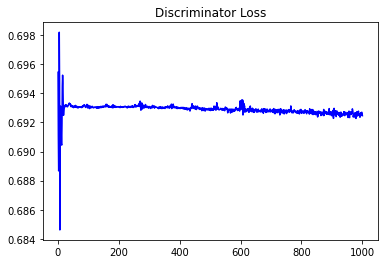

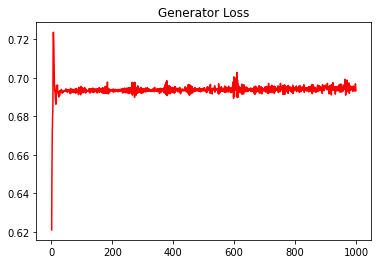

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0753898111527233


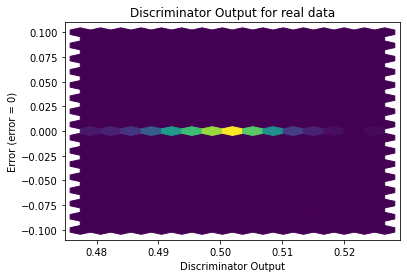

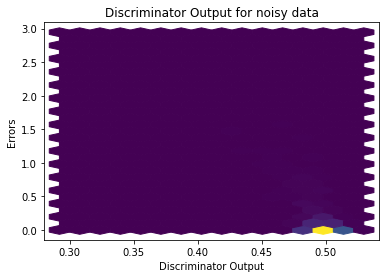

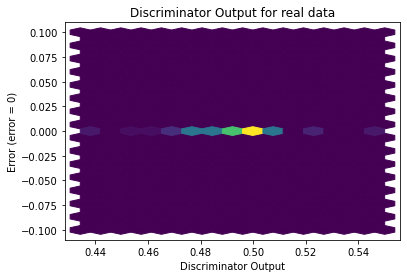

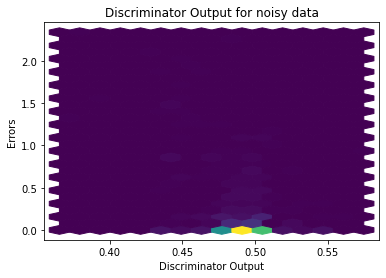

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


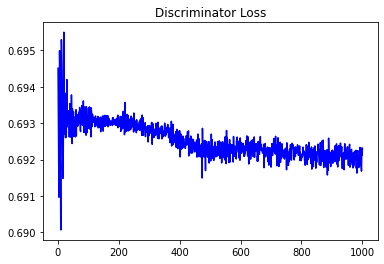

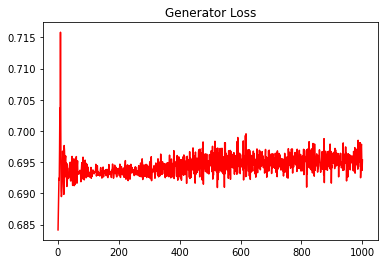

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08335906974567835


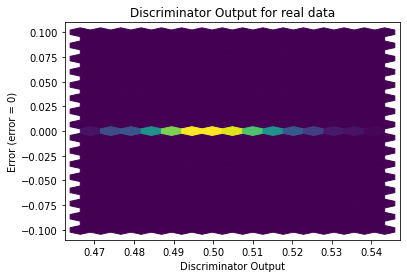

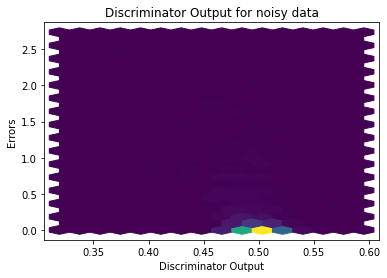

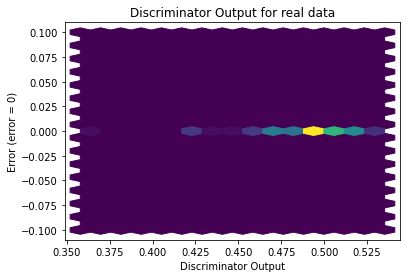

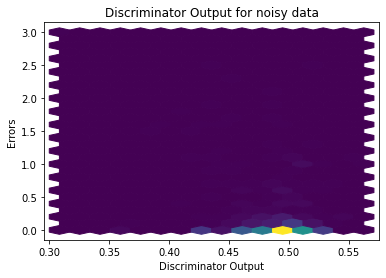

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3897]], requires_grad=True)
